# Graphs of COVID cases data by region
### Might do predictions/regressions later idk


In [32]:
#%%debug
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np 
import pandas as pd

# All confirmed cases
path_cases = "./csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
all_cases_df = pd.read_csv(path_cases, header=0)

# Recovered cases
path_recovered = "./csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"
recovered_df = pd.read_csv(path_recovered, header=0)

path_out = "./graphs/"

# Select date range where
# start_date_idx: 0=1/22, 32=2/19 etc
start_date_idx = 32
dates = all_cases_df.columns[start_date_idx:-1]

# Active cases = all cases - recovered
active_cases_df = all_cases_df
active_cases_df[dates] = active_cases_df[dates].sub(recovered_df[dates])

In [36]:
# Plot regions (each region is a subplot)
def plot_place(df, column, dates, ylabel="Cases", title="Regions", style="bmh"):
    fig, ax = plt.subplots(figsize=(20, 10)) 
    for region in df[column]:
        region_data = df.loc[lambda c: df[column] == region, dates]
        ax.plot(dates, 
                region_data.transpose(),
                label=region)
        loc = plticker.MultipleLocator(base=3.0) # Put tick at every <base> days
        ax.xaxis.set_major_locator(loc)
        ax.set(xlabel="Date", ylabel=ylabel)
    plt.title(title)
    plt.legend(loc="upper left")
    fig.savefig("{}{}_{}_{}".format(
        path_out, 
        title.replace(" ", "-"), 
        dates[0].replace("/", "-"), 
        dates[-1].replace("/", "-"))
    )
    # bmh and dark_background are cool
    plt.style.use(style)
    plt.show()

## Top 15 regions (including countries, provinces, states) 

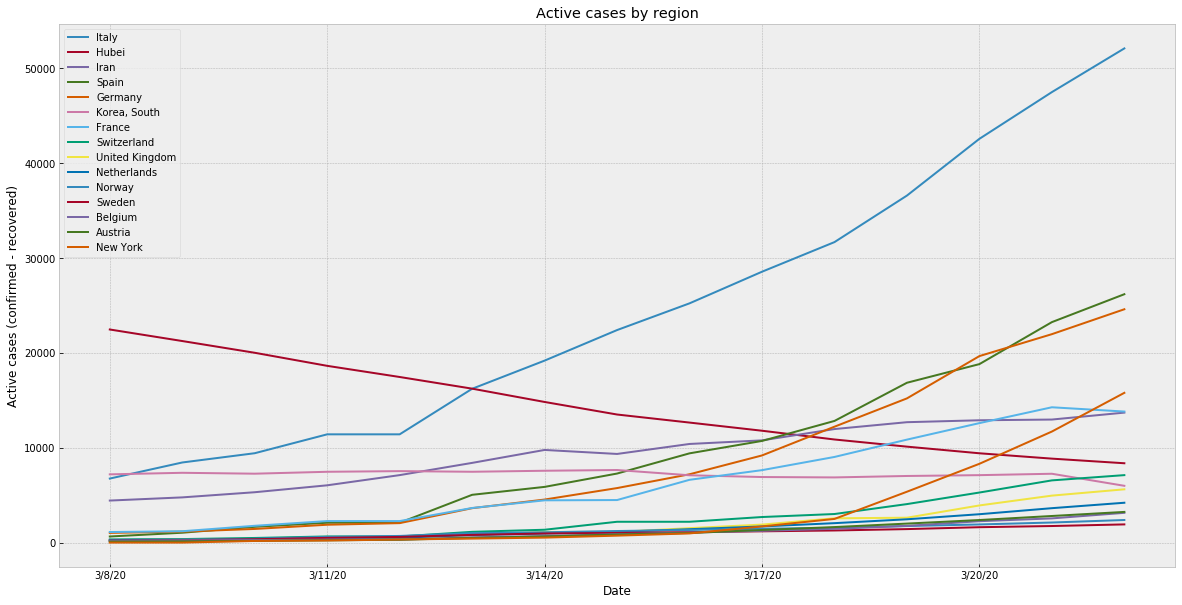

In [37]:
# Fill in any missing Province/State with country
countries_states = active_cases_df.copy()
countries_states["Province/State"].fillna(countries_states["Country/Region"], inplace=True) 

# Show regions with highest number of cases 1 week ago
num_regions = 15
countries_states = countries_states.nlargest(num_regions, dates[-7])

# Plot countries/provinces in selected range
plot_place(countries_states, 
           "Province/State", 
           dates, 
           ylabel="Active cases (confirmed - recovered)", 
           title="Active cases by region")

## Top 20 countries

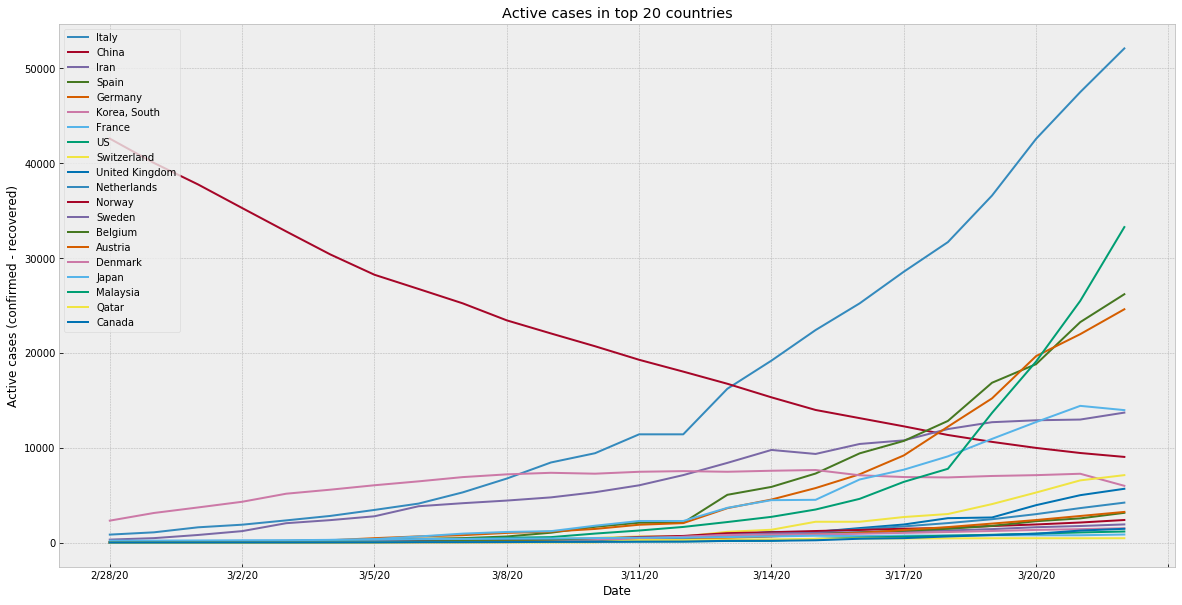

In [38]:
# Group all states/provinces together into countries
countries = active_cases_df.groupby('Country/Region', squeeze=True).sum().reset_index()

# Select date range where
# start_date_idx: 0=1/22, 32=2/19 etc
start_date_idx = 40
dates = countries.columns[start_date_idx:-1]

# Select 15 regions with highest number of cases as of 1 week ago
num_regions = 20
countries = countries.nlargest(num_regions, dates[-7])
plot_place(countries, 
           "Country/Region", 
           dates, 
           ylabel="Active cases (confirmed - recovered)", 
           title="Active cases in top 20 countries")

## US States

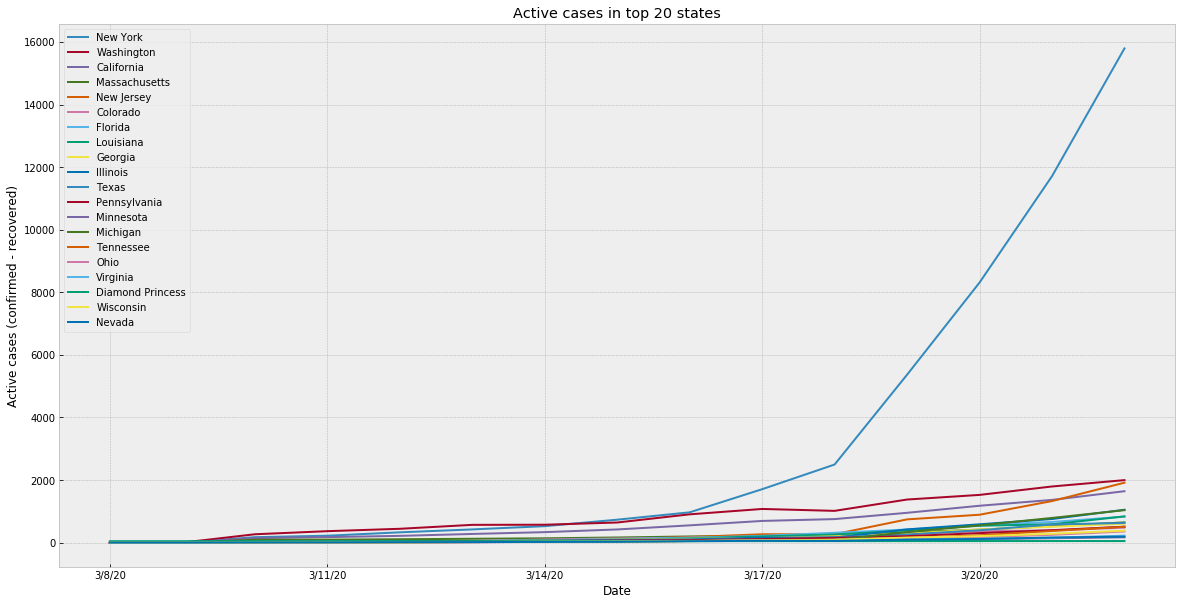

In [41]:
states = active_cases_df[active_cases_df['Country/Region'].eq("US")]

# Get rid of counties/cities
states = states[~states["Province/State"].str.contains(",")]

num_states = 20
states = states.nlargest(num_regions, dates[-7])

# Select date range where
# start_date_idx: 0=1/22, 32=2/19 etc
start_date_idx = 50
dates = states.columns[start_date_idx:-1]

plot_place(states, 
           "Province/State", 
           dates, 
           ylabel="Active cases (confirmed - recovered)", 
           title="Active cases in top 20 states")

In [ ]:
"""
# Select date range where
# start_date_idx: 0=1/22, 32=2/19 etc
start_date_idx = 40
dates = countries.columns[start_date_idx:-1]

# Select 15 regions with highest number of cases as of 1 week ago
num_regions = 20
countries = countries.nlargest(num_regions, dates[-7])
plot_place(countries, 
           "Country/Region", 
           dates, 
           ylabel="Active cases (confirmed - recovered)", 
           title="Active cases in top 20 countries")
           """

In [47]:
# Do % of population and compare to hospital beds